Date incarcate cu succes: 33 puncte.


/tmp/ipython-input-1276220332.py:10: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv('date.csv', delim_whitespace=True, header=None, names=['x', 'y'])


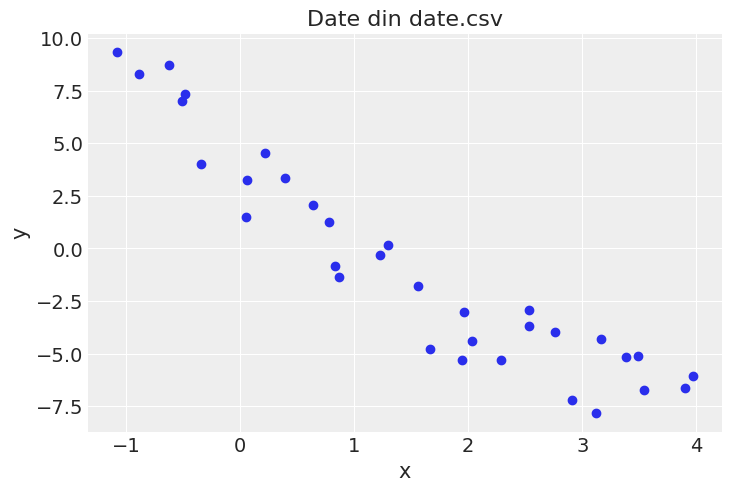

In [11]:
import pymc as pm
import numpy as np
import matplotlib.pyplot as plt
import arviz as az
import pandas as pd

az.style.use('arviz-darkgrid')

try:
    df = pd.read_csv('date.csv', delim_whitespace=True, header=None, names=['x', 'y'])
    x_1 = df['x'].values
    y_1 = df['y'].values
    print(f"Date incarcate cu succes: {len(x_1)} puncte.")
except FileNotFoundError:
    print("Fisierul date.csv nu a fost gasit. Se genereaza date sintetice.")
    np.random.seed(42)
    x_1 = np.random.uniform(-1.7, 1.7, 33)
    y_1 = 1.5 * x_1 - 0.5 * x_1**2 + np.random.normal(0, 0.5, 33)

plt.scatter(x_1, y_1)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Date din date.csv')
plt.show()

Exercitiul 1

Output()

Output()

Output()

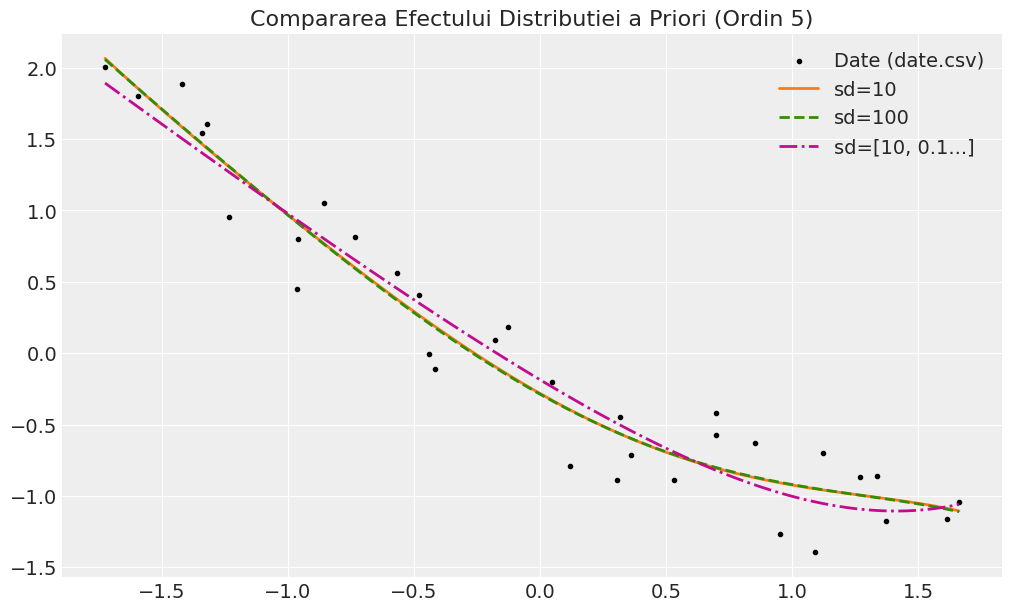

In [12]:

order = 5

x_1p = np.vstack([x_1**i for i in range(1, order+1)])
x_1s = (x_1p - x_1p.mean(axis=1, keepdims=True)) / x_1p.std(axis=1, keepdims=True)
y_1s = (y_1 - y_1.mean()) / y_1.std()

x_new = np.linspace(x_1.min(), x_1.max(), 100)
x_new_p = np.vstack([x_new**i for i in range(1, order+1)])
x_new_s = (x_new_p - x_1p.mean(axis=1, keepdims=True)) / x_1p.std(axis=1, keepdims=True)

#  1a.
with pm.Model() as model_p5:
    alpha = pm.Normal('alpha', mu=0, sigma=1)
    beta = pm.Normal('beta', mu=0, sigma=10, shape=order)
    epsilon = pm.HalfNormal('epsilon', 5)
    mu = alpha + pm.math.dot(beta, x_1s)
    y_pred = pm.Normal('y_pred', mu=mu, sigma=epsilon, observed=y_1s)
    idata_p5 = pm.sample(2000, return_inferencedata=True, progressbar=True, target_accept=0.95)

#  1b.
with pm.Model() as model_p5_flat:
    alpha = pm.Normal('alpha', mu=0, sigma=1)
    beta = pm.Normal('beta', mu=0, sigma=100, shape=order)
    epsilon = pm.HalfNormal('epsilon', 5)
    mu = alpha + pm.math.dot(beta, x_1s)
    y_pred = pm.Normal('y_pred', mu=mu, sigma=epsilon, observed=y_1s)
    idata_p5_flat = pm.sample(2000, return_inferencedata=True, progressbar=True, target_accept=0.95)

#  1c.
sd_array = np.array([10, 0.1, 0.1, 0.1, 0.1])
with pm.Model() as model_p5_reg:
    alpha = pm.Normal('alpha', mu=0, sigma=1)
    beta = pm.Normal('beta', mu=0, sigma=sd_array, shape=order)
    epsilon = pm.HalfNormal('epsilon', 5)
    mu = alpha + pm.math.dot(beta, x_1s)
    y_pred = pm.Normal('y_pred', mu=mu, sigma=epsilon, observed=y_1s)
    idata_p5_reg = pm.sample(2000, return_inferencedata=True, progressbar=True, target_accept=0.95)

plt.figure(figsize=(10, 6))
plt.scatter(x_1s[0], y_1s, c='black', marker='.', label='Date (date.csv)')

for idata, label, color, style in [
    (idata_p5, 'sd=10', 'C1', '-'),
    (idata_p5_flat, 'sd=100', 'C2', '--'),
    (idata_p5_reg, 'sd=[10, 0.1...]', 'C3', '-.')
]:
    alpha_post = idata.posterior['alpha'].mean(("chain", "draw")).values
    beta_post = idata.posterior['beta'].mean(("chain", "draw")).values
    y_post = alpha_post + np.dot(beta_post, x_new_s)
    plt.plot(x_new_s[0], y_post, color=color, linestyle=style, linewidth=2, label=label)

plt.title('Compararea Efectului Distributiei a Priori (Ordin 5)')
plt.legend()
plt.show()

Exercitiul 2.

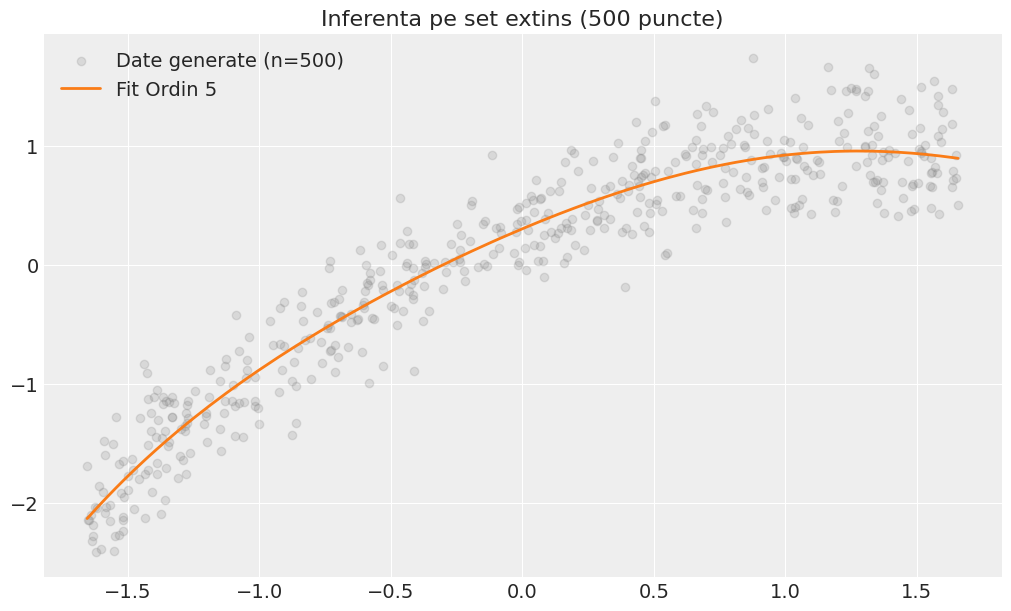

In [17]:

def generate_data(n=500):
    np.random.seed(42)
    x = np.random.uniform(-1.7, 1.7, n)
    y = 1.5 * x - 0.5 * x**2 + np.random.normal(0, 0.5, n)
    return x, y

x_500, y_500 = generate_data(n=500)

x_500_p = np.vstack([x_500**i for i in range(1, 5+1)])
x_500_s = (x_500_p - x_500_p.mean(axis=1, keepdims=True)) / x_500_p.std(axis=1, keepdims=True)
y_500_s = (y_500 - y_500.mean()) / y_500.std()

with pm.Model() as model_500:
    alpha = pm.Normal('alpha', mu=0, sigma=1)
    beta = pm.Normal('beta', mu=0, sigma=10, shape=5)
    epsilon = pm.HalfNormal('epsilon', 5)
    mu = alpha + pm.math.dot(beta, x_500_s)
    y_pred = pm.Normal('y_pred', mu=mu, sigma=epsilon, observed=y_500_s)
    idata_500 = pm.sample(2000, return_inferencedata=True, progressbar=False)

idx = np.argsort(x_500_s[0])
alpha_post = idata_500.posterior['alpha'].mean(("chain", "draw")).values
beta_post = idata_500.posterior['beta'].mean(("chain", "draw")).values
y_fit = alpha_post + np.dot(beta_post, x_500_s)

plt.figure(figsize=(10, 6))
plt.scatter(x_500_s[0], y_500_s, alpha=0.2, c='gray', label='Date generate (n=500)')
plt.plot(x_500_s[0][idx], y_fit[idx], 'C1', linewidth=2, label='Fit Ordin 5')
plt.title('Inferenta pe set extins (500 puncte)')
plt.legend()
plt.show()

Exercitiul 3

Output()

Output()

Output()

Rezultate WAIC (valorile mai mici sunt mai bune):
         rank  elpd_waic    p_waic  elpd_diff        weight        se  \
Ordin 2     0   9.015549  2.575585   0.000000  1.000000e+00  4.593447   
Ordin 3     1  11.047597  3.373233   2.032048  0.000000e+00  4.635714   
Ordin 1     2  28.661462  2.398412  19.645913  2.733369e-13  5.313306   

              dse  warning     scale  
Ordin 2  0.000000    False  deviance  
Ordin 3  0.691601    False  deviance  
Ordin 1  5.307495    False  deviance  


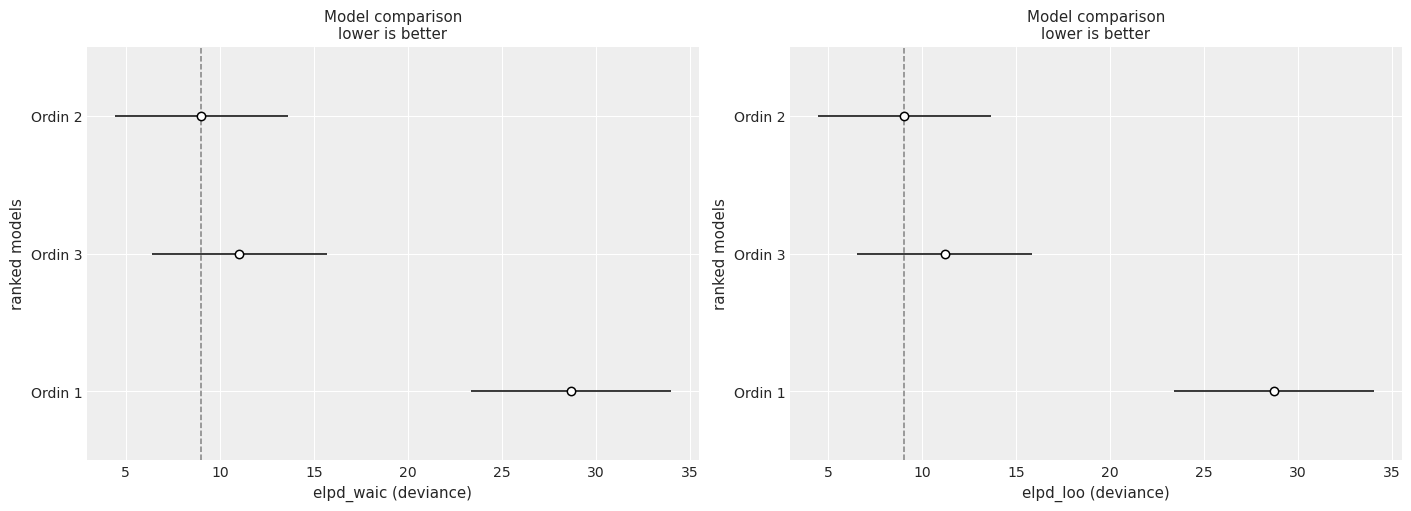

In [15]:

models = {}
traces = {}

orders = [1, 2, 3]

for k in orders:
    x_k = x_1s[:k, :]

    with pm.Model() as current_model:
        alpha = pm.Normal('alpha', mu=0, sigma=1)
        beta = pm.Normal('beta', mu=0, sigma=10, shape=k)
        epsilon = pm.HalfNormal('epsilon', 5)

        mu = alpha + pm.math.dot(beta, x_k)
        y_pred = pm.Normal('y_pred', mu=mu, sigma=epsilon, observed=y_1s)

        pm.compute_log_likelihood(idata := pm.sample(2000, return_inferencedata=True, progressbar=False))

        models[f'Ordin {k}'] = current_model
        traces[f'Ordin {k}'] = idata

comp_waic = az.compare(traces, ic="waic", scale="deviance")
comp_loo = az.compare(traces, ic="loo", scale="deviance")

print("Rezultate WAIC (valorile mai mici sunt mai bune):")
print(comp_waic)

fig, ax = plt.subplots(1, 2, figsize=(14, 5))
az.plot_compare(comp_waic, ax=ax[0], title="Comparatie WAIC")
az.plot_compare(comp_loo, ax=ax[1], title="Comparatie LOO")
plt.show()